## Train the whole dataset and test with random texts

In [1]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sparse
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/janeydong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import cleaned dataset

In [2]:
# Load yelp_vectorizer
yelp_vectorizer = sparse.load_npz('yelp_vectorizer.npz')

In [3]:
# load vectorizer
%store -r yelp_df_1_5 
%run 3_data_cleaning.ipynb   
message_cleaning(yelp_df_1_5['text']) 
vectorizer = pickle.load(open("vectorizer.pickle","rb"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/janeydong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Model Training (Use complete dataset without splitting into training and test dataset)

In [4]:
# Create the features (X) and target (y) sets
X = yelp_vectorizer
y = yelp_df_1_5['stars'].values


In [5]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
                                                    

In [6]:
# Create a multinomialNB model
NB_classifier = MultinomialNB()


In [7]:
# Fitting the model
NB_classifier.fit(X_train, y_train)


MultinomialNB()

In [8]:
y_predict_train = NB_classifier.predict(X_train)

In [9]:
cm_train = confusion_matrix(y_train, y_predict_train)
cm_train

array([[1844,  143],
       [ 147, 5954]])

<AxesSubplot:>

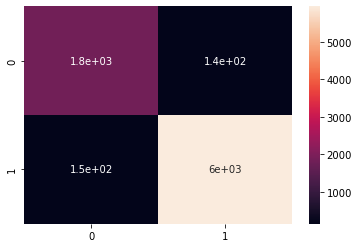

In [10]:
sns.heatmap(cm_train, annot = True)

In [11]:
y_predict_test = NB_classifier.predict(X_test)

In [12]:
cm_test = confusion_matrix(y_test, y_predict_test)
cm_test

array([[ 585,   96],
       [  97, 1919]])

<AxesSubplot:>

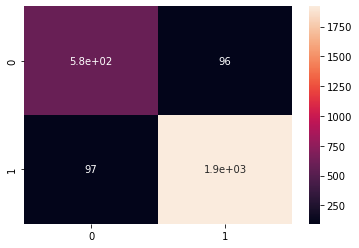

In [13]:
sns.heatmap(cm_test, annot = True)

In [14]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         1.0       0.86      0.86      0.86       681
         5.0       0.95      0.95      0.95      2016

    accuracy                           0.93      2697
   macro avg       0.91      0.91      0.91      2697
weighted avg       0.93      0.93      0.93      2697



In [20]:
testing_sample = ['The worst one in America. They charged 19$ and the service is so worst. It was so quick with less than 3 minutes. Charged for cleaning Rims, windows, interior too. But it was never touched and the exterior cleaning was horrible too.Also, said that they would spray anti-rust on the bottom but never did it. I would very strongly recommend not to visit this unless you want to pay free money.']
##testing_sample = ['Fun place! Isabelle was great!!! She was friendly and very accommodating! She helped us decide between all the signature drinks they have here!']

testing_sample_vectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_vectorizer)

test_predict

array([1.])